<h1><Center>Bike sharing case study</center></h1>

<center><h3>Steps i will follow for building an effective model for predicting the <I>demand</i> of shared bikes  using CRISP DM framework-:  </h3></center>

-  <B>Bussiness Understanding</B>
-  <B>Data Understanding  (EDA p.1)</B>
-  <B>Data Preparation    (EDA p.2)</B>
> cleaning null values , checking for duplications , checking data types , removing outliers , dropping unimportant columns .<BR> Univariate analysis , Bivariate analysis ,multivariate analysis , summary
-  <B>Modeling a linear regression model on Data set</B>
> spliting into test train data set<BR>Creating dummy varaibles <BR>Scaling numerical values by normalization <br> Building  linear regression models <B>(Using Top-Down feature elemination method , Iteratively by checking the significance , and multi colinearity of the feature)</B>  
-  <B>Evaluation of model</B>
> Resudial analysis , accessing the final model .
 <BR>Predict the test target variable and check for the coefficienr of determination .

<center><h1>Bussiness Understanding</h1></center>

1.  Target client <B>BoomBikes</B> is a bike sharing company , BoomBikes aspires to understand the factors taht affect demand of shared bikes after quarantine situation ends across the nation due to Covid-19 , and use those factors to stay ahead of the market compitition in a post COVID american market .
2.  What are shared bikes ?
> Shared bikes are the bikes which a person can take for rent ,or free and returns the bike before/on the stipulated time , on the platform ("dock") belonging to the same company , in our case <B>to the Boombikes</B> .

<center><h1>Data Understanding</h1></center>

1.  We have given a dataset named <B>day.csv</B> , which is a day wise transactional data describibg the factors which affects the total client counts.
2.  The Dataset is containing the following columns or variables , which are described in the data dictionary <B>Readme.txt</B> , let's look into those.
    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
3.  Here Our target or dependent variable is <B>cnt</B> and all other variables are predictors or independent variables

<center><h1>Data Preparation</h1></center>

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import warnings as warning
warning.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
bikeshare_df=pd.read_csv("day.csv")

In [3]:
bikeshare_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


<center><h4>Checking for null values</h4></center>

In [4]:
bikeshare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-  We have seen there are no null values in our data set .
-  Neither any column is repeated.

<center><h4>Correcting data types</h4></center>

-  We can see the type of date is object hence we need to convert it to date time  

In [5]:
bikeshare_df.dteday=pd.to_datetime(bikeshare_df.dteday)

<center><h4>Removing Unimportant columns / variables</h4></center>

-  As we can see <B>instant</B> column is just an index , which does not have any effect to demand we can remove this

In [6]:
bikeshare_df=bikeshare_df.drop("instant",axis=1)

-  <B>dteday</B> it self does not give us any inside on demand and as we have furthure categorization of working days and weekend/holiday which might be a good indicator of the demand , let's remove the dteday column.

In [7]:
bikeshare_df=bikeshare_df.drop("dteday",axis=1)

In [8]:
bikeshare_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


-  We can see <B>workingday</B> column explains whether it is a <B>holiday</B> or <B>weekend</B> , or it is a <B>workingday</B> , hence we can certinely remove the <B>holiday</B> and <B>weekday</B> column .

In [9]:
bikeshare_df=bikeshare_df.drop(["holiday","weekday"],axis=1)

In [10]:
bikeshare_df.head()

,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Let's quickly check the correlation between numerical variables using heat map and pairplot.

<AxesSubplot:>

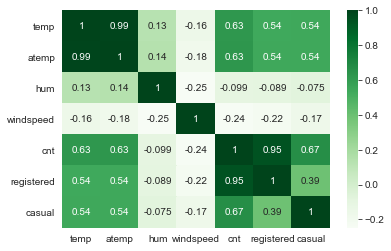

In [11]:

sns.heatmap(bikeshare_df[['temp','atemp','hum','windspeed','cnt','registered','casual']].corr(),cmap='Greens',annot=True)

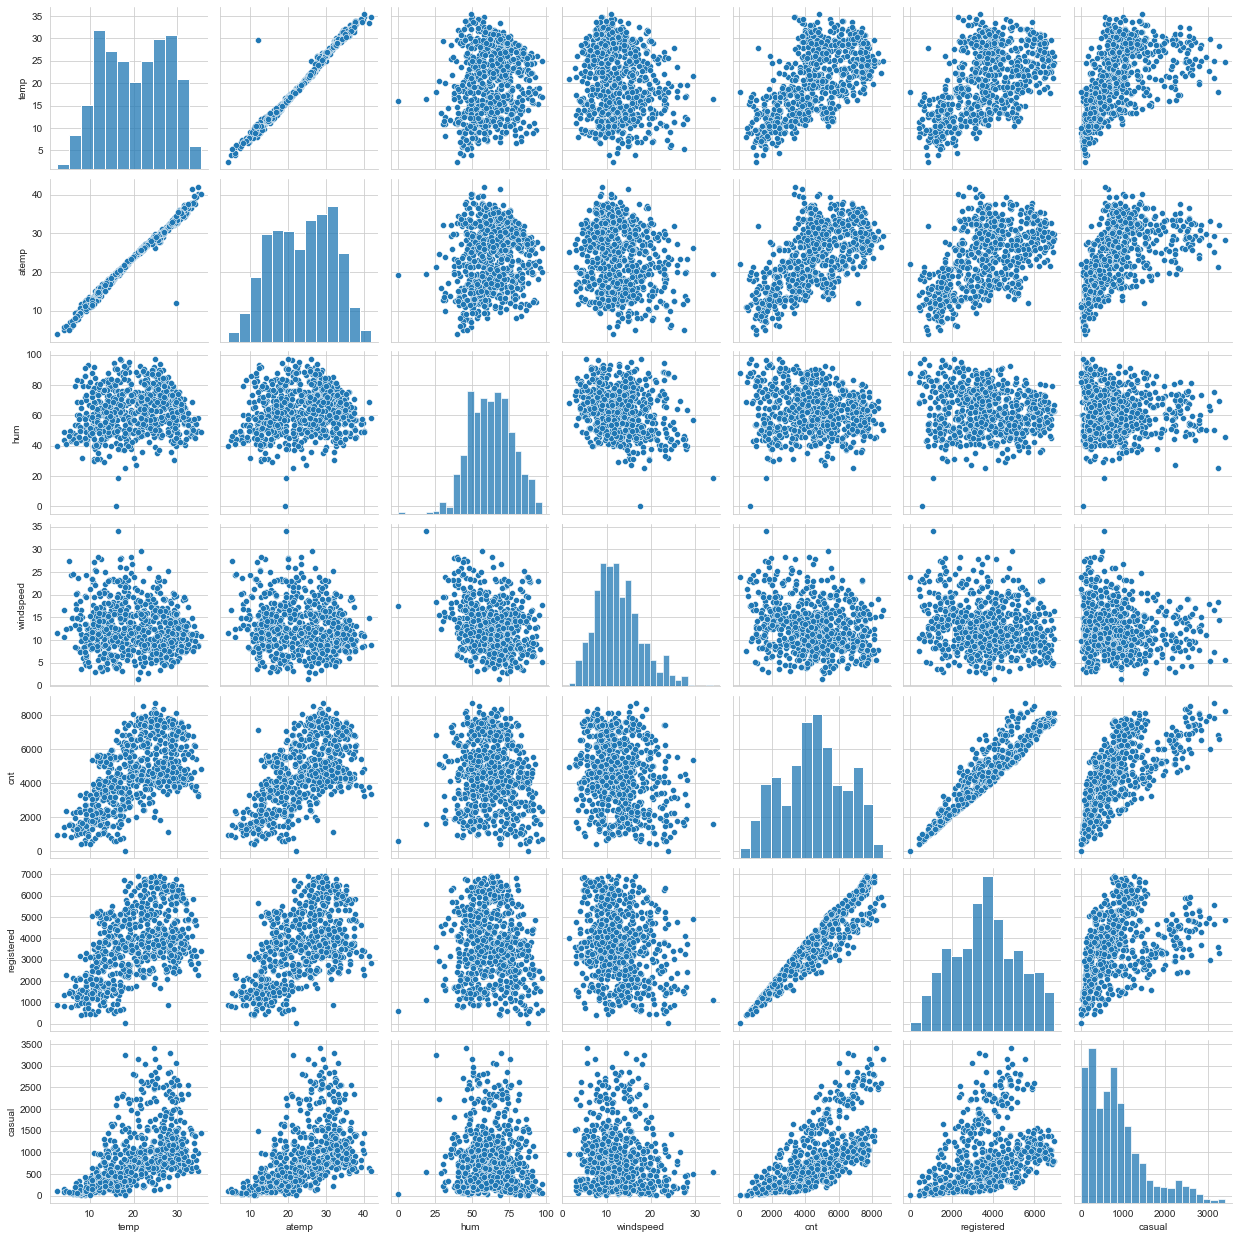

In [12]:
sns.pairplot(bikeshare_df[['temp','atemp','hum','windspeed','cnt','registered','casual']])
plt.xlabel(['temp','atemp','hum','windspeed','cnt'],fontdict={'fontsize':20})
plt.ylabel(['temp','atemp','hum','windspeed','cnt'],fontdict={'fontsize':20})
plt.show()

-  If we see <B>aTemp</B> is the feeling temperature in Celsius or heat index , which people can feel due to the combined effect of <B>acttual temprature</B> , <B>humidity</B> and <B>windspeed</B> . https://en.wikipedia.org/wiki/Heat_index
-  Hence the <B>feeling temprature</B> is a product of <B>windspeed</B> , <B>humidity</B> and the <B>acttual temprature</B> let's drop the <B>hum</B>,<B>temp</B> and <B>windspeed</B> from our dataset as it can  raise multicolinearity.

In [13]:
bikeshare_df=bikeshare_df.drop(["temp","hum","windspeed"],axis=1)

In [14]:
bikeshare_df.head()

,season,yr,mnth,workingday,weathersit,atemp,casual,registered,cnt
0,1,0,1,0,2,18.18125,331,654,985
1,1,0,1,0,2,17.68695,131,670,801
2,1,0,1,1,1,9.47025,120,1229,1349
3,1,0,1,1,1,10.60610,108,1454,1562
4,1,0,1,1,1,11.46350,82,1518,1600


-  We can clearly see the <B>casual</B> and <B>registered</B> population are adding upto the <B>total count of the clients</B> on that particular day , so the <B>casual</B> and <B>registered</B> columns can rise multicolinearity.
-  Hence let's remove them from our data set. 

In [15]:
bikeshare_df=bikeshare_df.drop(["casual","registered"],axis=1)

In [16]:
bikeshare_df.head()

,season,yr,mnth,workingday,weathersit,atemp,cnt
0,1,0,1,0,2,18.18125,985
1,1,0,1,0,2,17.68695,801
2,1,0,1,1,1,9.47025,1349
3,1,0,1,1,1,10.60610,1562
4,1,0,1,1,1,11.46350,1600


-  We can see the weathersit column is representing the following :
>weathersit :<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

And we need to convert them to string values like 1:Very good , 2:good , 3:bad , 4:Very bad whether condition
-  <B>Why ?</B>
>Because we can not just put them into linear regression model to predict demand based on their numerical value , as these are categorical , later in model building phase we will convert these categories into dummy variables .

- <B> Why not drop it ?</B>
>The weather condition is highly effective to the demand as people might want to travel in a good weather codition rather than a bad one.

In [17]:
bikeshare_df.weathersit=bikeshare_df.weathersit.map({1:'VeryGood_W',2:'Good_W',3:'Bad_W',4:'VeryBad_W'})

In [18]:
bikeshare_df.head()

,season,yr,mnth,workingday,weathersit,atemp,cnt
0,1,0,1,0,Good_W,18.18125,985
1,1,0,1,0,Good_W,17.68695,801
2,1,0,1,1,VeryGood_W,9.47025,1349
3,1,0,1,1,VeryGood_W,10.60610,1562
4,1,0,1,1,VeryGood_W,11.46350,1600


-  We can see the season column is representing the following :
>season (1:spring, 2:summer, 3:fall, 4:winter)<br>And we need to convert these to string values. 
-  <B>Why ?</B>
>Because we can not just put them into linear regression model to predict demand based on their numerical value , as these are categorical , later in model building phase we will convert these categories into dummy variables .

- <B> Why not drop it ?</B>
>The season is highly effective to the demand as people might want to travel in fall and spring in comparision to extremely hot summer or extremly cold winter.

In [19]:
bikeshare_df.season=bikeshare_df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [20]:
bikeshare_df.head()

,season,yr,mnth,workingday,weathersit,atemp,cnt
0,spring,0,1,0,Good_W,18.18125,985
1,spring,0,1,0,Good_W,17.68695,801
2,spring,0,1,1,VeryGood_W,9.47025,1349
3,spring,0,1,1,VeryGood_W,10.60610,1562
4,spring,0,1,1,VeryGood_W,11.46350,1600


-  If we observe then the seasons and years are describing the demands in macro level in comarision to months, and months are cyclical in nature , hence it might not affect our target variable. Hence we can remove it.

In [21]:
bikeshare_df=bikeshare_df.drop(["mnth"],axis=1)

In [22]:
bikeshare_df.head()

,season,yr,workingday,weathersit,atemp,cnt
0,spring,0,0,Good_W,18.18125,985
1,spring,0,0,Good_W,17.68695,801
2,spring,0,1,VeryGood_W,9.47025,1349
3,spring,0,1,VeryGood_W,10.60610,1562
4,spring,0,1,VeryGood_W,11.46350,1600


<center><h4>Outliers analysis</h4></center>

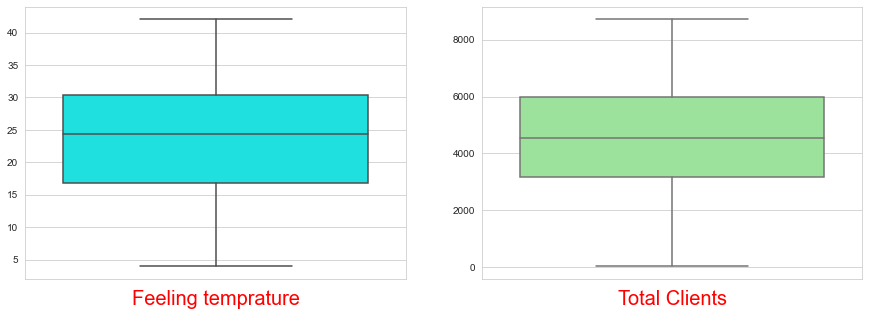

In [23]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(y=bikeshare_df.atemp , color='cyan')
plt.xlabel("Feeling temprature",fontdict={"fontsize":20,"color":'Red'})
plt.ylabel('')
plt.subplot(1,2,2)
sns.boxplot(y=bikeshare_df.cnt,color='lightgreen')
plt.xlabel("Total Clients",fontdict={"fontsize":20,"color":'Red'})
plt.ylabel('')
plt.show()

- <B>Observation-:</B>  We can clearly see there are no outliers in our numerical columns

<center><h1>Univariate analysis</h1></center>

Let's do some univariate analysis on the dataset to find out the spread of data. 

In [24]:
bikeshare_df.head()

,season,yr,workingday,weathersit,atemp,cnt
0,spring,0,0,Good_W,18.18125,985
1,spring,0,0,Good_W,17.68695,801
2,spring,0,1,VeryGood_W,9.47025,1349
3,spring,0,1,VeryGood_W,10.60610,1562
4,spring,0,1,VeryGood_W,11.46350,1600


In [25]:
bikeshare_df.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

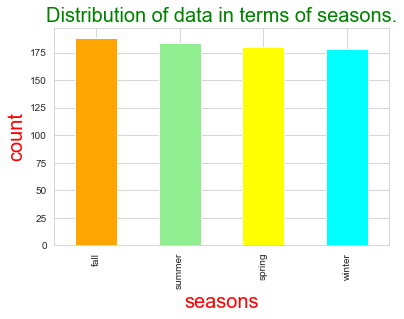

In [26]:
bikeshare_df.season.value_counts().plot.bar(align='center',color=['orange','lightgreen','yellow','cyan'])
plt.title("Distribution of data in terms of seasons.",fontdict={'fontsize':20,'color':'green'})
plt.xlabel("seasons",fontdict={"fontsize":20,"color":'Red'})
plt.ylabel("count",fontdict={"fontsize":20,"color":'Red'})
plt.show()


<B>Observation-:</B> We can see there is almost equal distribution of data on all the season.

In [27]:
bikeshare_df.yr.unique()

array([0, 1], dtype=int64)

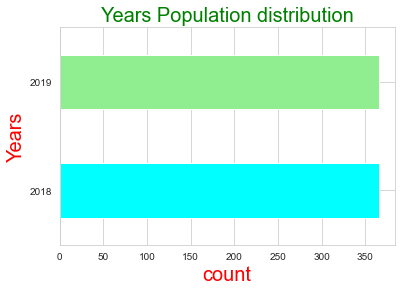

In [28]:
bikeshare_df.yr.value_counts().plot.barh(color=["cyan","lightgreen"])
yticks=[0,1]
plt.yticks(yticks,['2018','2019'])
plt.title("Years Population distribution" , fontdict={'fontsize':20,'color':'Green'})
plt.ylabel("Years",fontdict={"fontsize":20,"color":'Red'})
plt.xlabel("count",fontdict={"fontsize":20,"color":'Red'})
plt.show()

<B>Observation-:</B> we can see in both the years the population is distributed almost equally

In [29]:
bikeshare_df.workingday.unique()

array([0, 1], dtype=int64)

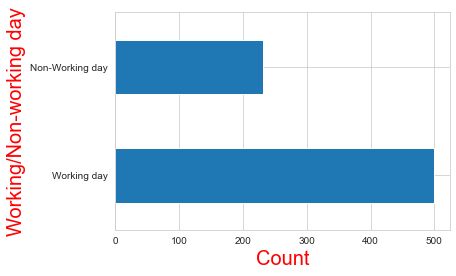

In [30]:
bikeshare_df.workingday.value_counts().plot.barh()
xticks=[0,1]
plt.yticks(xticks,['Working day','Non-Working day'])
plt.ylabel("Working/Non-working day",fontdict={"fontsize":20,"color":'Red'})
plt.xlabel("Count",fontdict={"fontsize":20,"color":'Red'})
plt.show()
#in the given data set the working days are higher than the non working days.

<B>Observation-:</B> we can see in given datset <B>working</B> days are lesser than <B>non working</B> days.

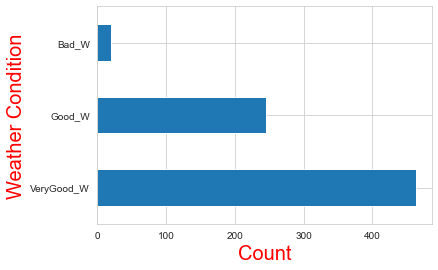

In [31]:
bikeshare_df.weathersit.value_counts().plot.barh()
plt.ylabel("Weather Condition",fontdict={"fontsize":20,"color":'Red'})
plt.xlabel("Count",fontdict={"fontsize":20,"color":'Red'})
plt.show()

<B>Observation-:</B> We can see distribution of population is zero for the very bad weather , and lesser for <b>bad weather</b> and increasing significantly with <b>better weather</b>. 

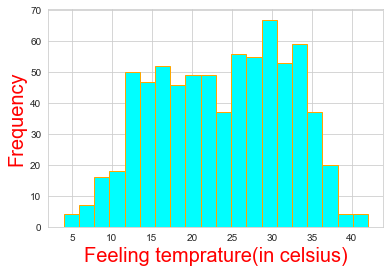

In [32]:
bikeshare_df.atemp.plot.hist(bins=20,edgecolor='orange',color='cyan')
plt.xlabel("Feeling temprature(in celsius)",fontdict={"fontsize":20,"color":'Red'})
plt.ylabel("Frequency",fontdict={"fontsize":20,"color":'Red'})
plt.show()

In [33]:
bikeshare_df.atemp.describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

<B>Observation-:</B> We can see distribution of population is very less toward the <B>extreme points</B> of <B>feeling temprature</B> , and increasing towards <b>mean temprature</b> which is <B>~24</B> degree celcius. 

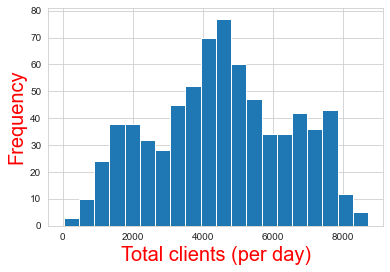

In [34]:
bikeshare_df.cnt.plot.hist(bins=20)
plt.xlabel("Total clients (per day)",fontdict={"fontsize":20,"color":'Red'})
plt.ylabel("Frequency",fontdict={"fontsize":20,"color":'Red'})
plt.show()

In [35]:
bikeshare_df.cnt.describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

<B>Observation-:</B> we can see in given datset <B>mean</B> of the total client is <B>4508</B> , can be as min as <B>22</B> and as max as <B>8714</B> per day. 

<center><h1>Bivariate analysis</h2></center>

In [36]:
bikeshare_df.head()

,season,yr,workingday,weathersit,atemp,cnt
0,spring,0,0,Good_W,18.18125,985
1,spring,0,0,Good_W,17.68695,801
2,spring,0,1,VeryGood_W,9.47025,1349
3,spring,0,1,VeryGood_W,10.60610,1562
4,spring,0,1,VeryGood_W,11.46350,1600


-  <B>Observation-:</B>  We will check the effect of predictor variables on our target variable <B>cnt</B>

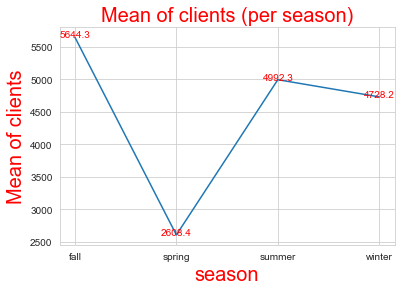

In [37]:
y=bikeshare_df.groupby("season").cnt.mean()
x=bikeshare_df.groupby("season").cnt.mean().index
plt.plot(x,y)
plt.title("Mean of clients (per season)",fontdict={"fontsize":20,"color":'Red'})
plt.xlabel("season",fontdict={"fontsize":20,"color":'Red'})
plt.ylabel("Mean of clients",fontdict={"fontsize":20,"color":'Red'})
for xy in zip(x,y):
    plt.annotate("{0}".format(round(xy[1],1)),xy=xy,textcoords='data',ha='center',color='red')
plt.show()

- <B>Observation-:</B>  we can see there is a huge fall in the demand or total clients in <B>spring</B> in <B>2018</B> and <B>2019</B> and in winter the demand seems to be falling too.

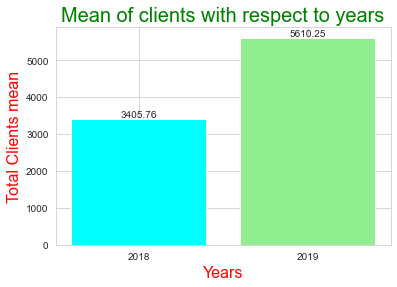

In [38]:
y=bikeshare_df.groupby("yr").cnt.mean()
x=bikeshare_df.groupby("yr").cnt.mean().index
chart=plt.bar(x,y,color=['cyan','lightgreen'])
xticks=[0,1]
plt.xticks(xticks,['2018','2019'])
plt.title("Mean of clients with respect to years",fontdict={'fontsize':20,'color':'Green'})
plt.xlabel("Years",fontdict={'fontsize':16,'color':'Red'})
plt.ylabel("Total Clients mean",fontdict={'fontsize':16,'color':'Red'})
for rect in chart:
    plt.annotate(round(rect.get_height(),2),
                 xy=(rect.get_x()+rect.get_width()/2,rect.get_height())
                 ,textcoords='data'
                ,va='bottom'
                ,ha='center')
plt.show()

- <B>Observation-:</B>  we can see there is a huge boost in the demand or total clients in <B>2019</B> in comparision to <B>2018</B>, which can be a sign of increasing popularity of the brand.

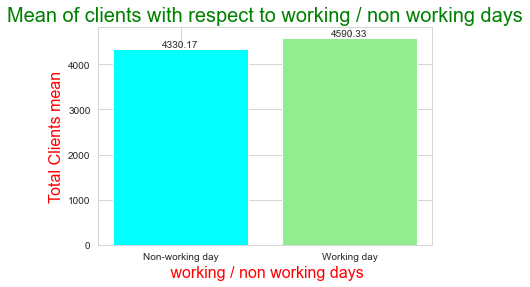

In [39]:
y=bikeshare_df.groupby("workingday").cnt.mean()
x=bikeshare_df.groupby("workingday").cnt.mean().index
chart=plt.bar(x,y,color=['cyan','lightgreen'])
xticks=[0,1]
plt.xticks(xticks,['Non-working day','Working day'])
plt.title("Mean of clients with respect to working / non working days",fontdict={'fontsize':20,'color':'Green'})
plt.xlabel(" working / non working days",fontdict={'fontsize':16,'color':'Red'})
plt.ylabel("Total Clients mean",fontdict={'fontsize':16,'color':'Red'})
for rect in chart:
    plt.annotate(round(rect.get_height(),2),
                 xy=(rect.get_x()+rect.get_width()/2,rect.get_height())
                 ,textcoords='data'
                ,va='bottom'
                ,ha='center')
plt.show()

<B>Observation-:</B> We can see the demand of shared bikes are more in case of <B>working days</B> in comparision to <B>non working days</B> .<BR>
<B>Assumption</B> -: Might be more people are using shared bikes for <B>commuting to workplace</B> or people are not travelling much if it is not as necessary as somthing like <B>work</B> as this data is recorded in COVID.

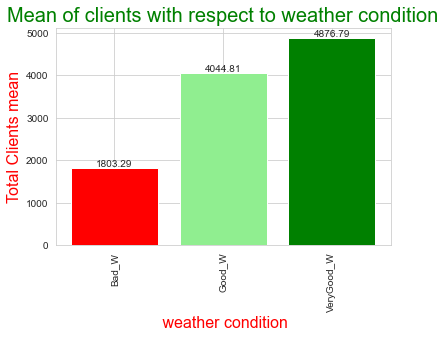

In [40]:
y=bikeshare_df.groupby("weathersit").cnt.mean()
x=bikeshare_df.groupby("weathersit").cnt.mean().index
chart=plt.bar(x,y,color=["Red",'lightgreen','Green'])

plt.xticks(rotation=90)
plt.title("Mean of clients with respect to weather condition",fontdict={'fontsize':20,'color':'Green'})
plt.xlabel(" weather condition",fontdict={'fontsize':16,'color':'Red'})
plt.ylabel("Total Clients mean",fontdict={'fontsize':16,'color':'Red'})
for rect in chart:
    plt.annotate(round(rect.get_height(),2),
                 xy=(rect.get_x()+rect.get_width()/2,rect.get_height())
                 ,textcoords='data'
                ,va='bottom'
                ,ha='center')
plt.show()

<B>Observation-:</B> We can see the demand of shared bikes are more in case of <B>very good weather condition</B> and null for<B> very bad weather condition </B>.

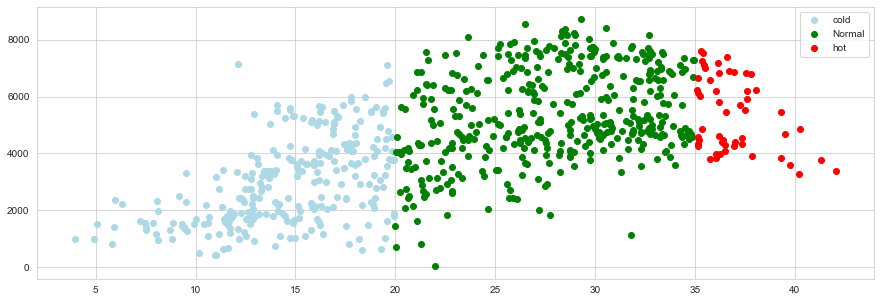

In [41]:
plt.figure(figsize=[15,5])
plt.scatter(bikeshare_df[bikeshare_df.atemp<20].atemp,bikeshare_df[bikeshare_df.atemp<20].cnt,c='lightblue',label='cold')
plt.scatter(bikeshare_df[(bikeshare_df.atemp>=20) &
                         ((bikeshare_df.atemp<=35)) ].atemp,bikeshare_df[(bikeshare_df.atemp>=20) &
                                                                         ((bikeshare_df.atemp<=35)) ].cnt
            ,c='green',label="Normal")
plt.scatter(bikeshare_df[(bikeshare_df.atemp>35) ].atemp,bikeshare_df[(bikeshare_df.atemp>35) ].cnt,c='red',label='hot')
plt.legend()
plt.show()

<B>Observation-:</B> We can see the <B>demand</B> or <B>total clients</B>  are higher in a normal heat index of <B>20 to 35</B> , above or below of this range number of clients are decreasing  

<center><h1>Multivariate analysis</h1></center>

In [42]:
bikeshare_df.head()

,season,yr,workingday,weathersit,atemp,cnt
0,spring,0,0,Good_W,18.18125,985
1,spring,0,0,Good_W,17.68695,801
2,spring,0,1,VeryGood_W,9.47025,1349
3,spring,0,1,VeryGood_W,10.60610,1562
4,spring,0,1,VeryGood_W,11.46350,1600


<center><h4>Understanding spread of mean of total clients in season w.r.t (weathersit,yr,workingday)</h4></center>

In [43]:
weathergroup=bikeshare_df.groupby("season")
dfs=[]
names=[]
for name, group in weathergroup:
    dfs.append(group)
    names.append(name)

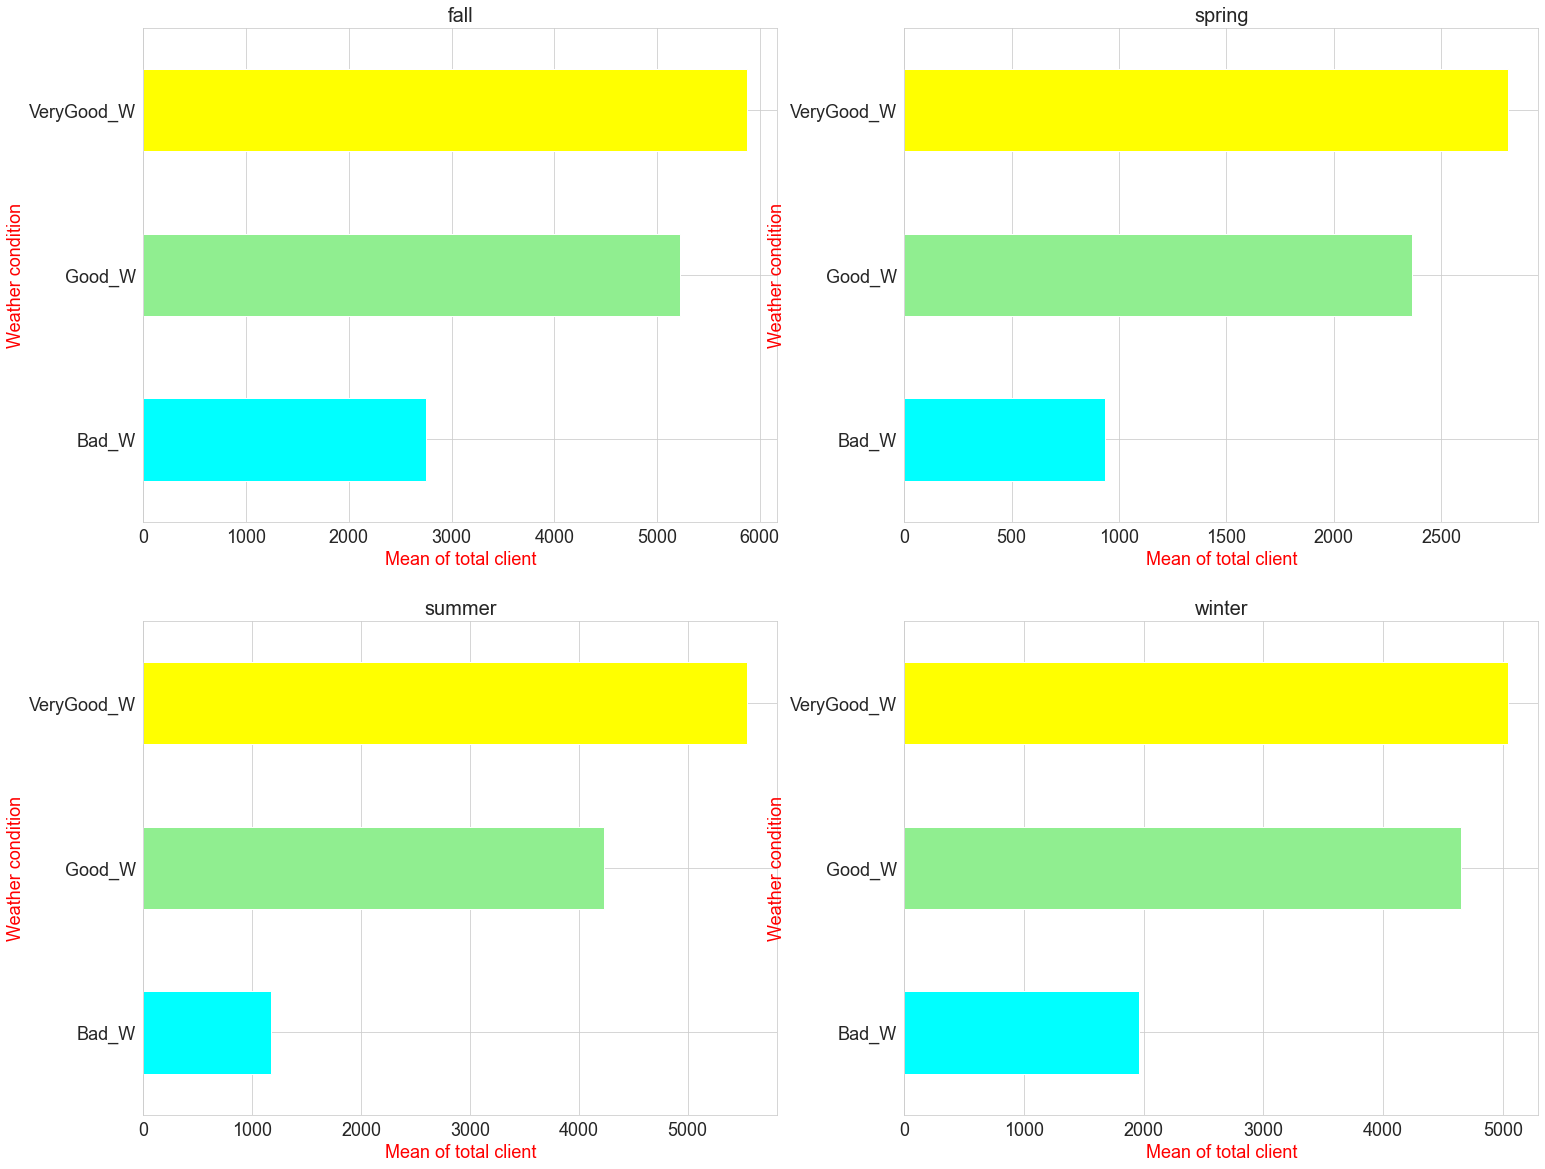

In [44]:
groupindex=0
plt.figure(figsize=[25,20])
for j in range(1,len(dfs)+1):
    plt.subplot(2,2,j)
    dfs[groupindex].groupby(['weathersit']).cnt.mean().plot.barh(color=['cyan','lightgreen','yellow','lightblue'])
    plt.title(names[groupindex],fontdict={'fontsize':20})
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylabel("Weather condition",fontdict={'fontsize':18,'color':'Red'})
    plt.xlabel("Mean of total client",fontdict={'fontsize':18,'color':'Red'})
    groupindex+=1
    
plt.show()

<B>Observation-:</B> We can see the <B>demand</B> or <B>total clients</B>  are significantly higher in a <B>very good weather condition</B> of across all the seasons. 

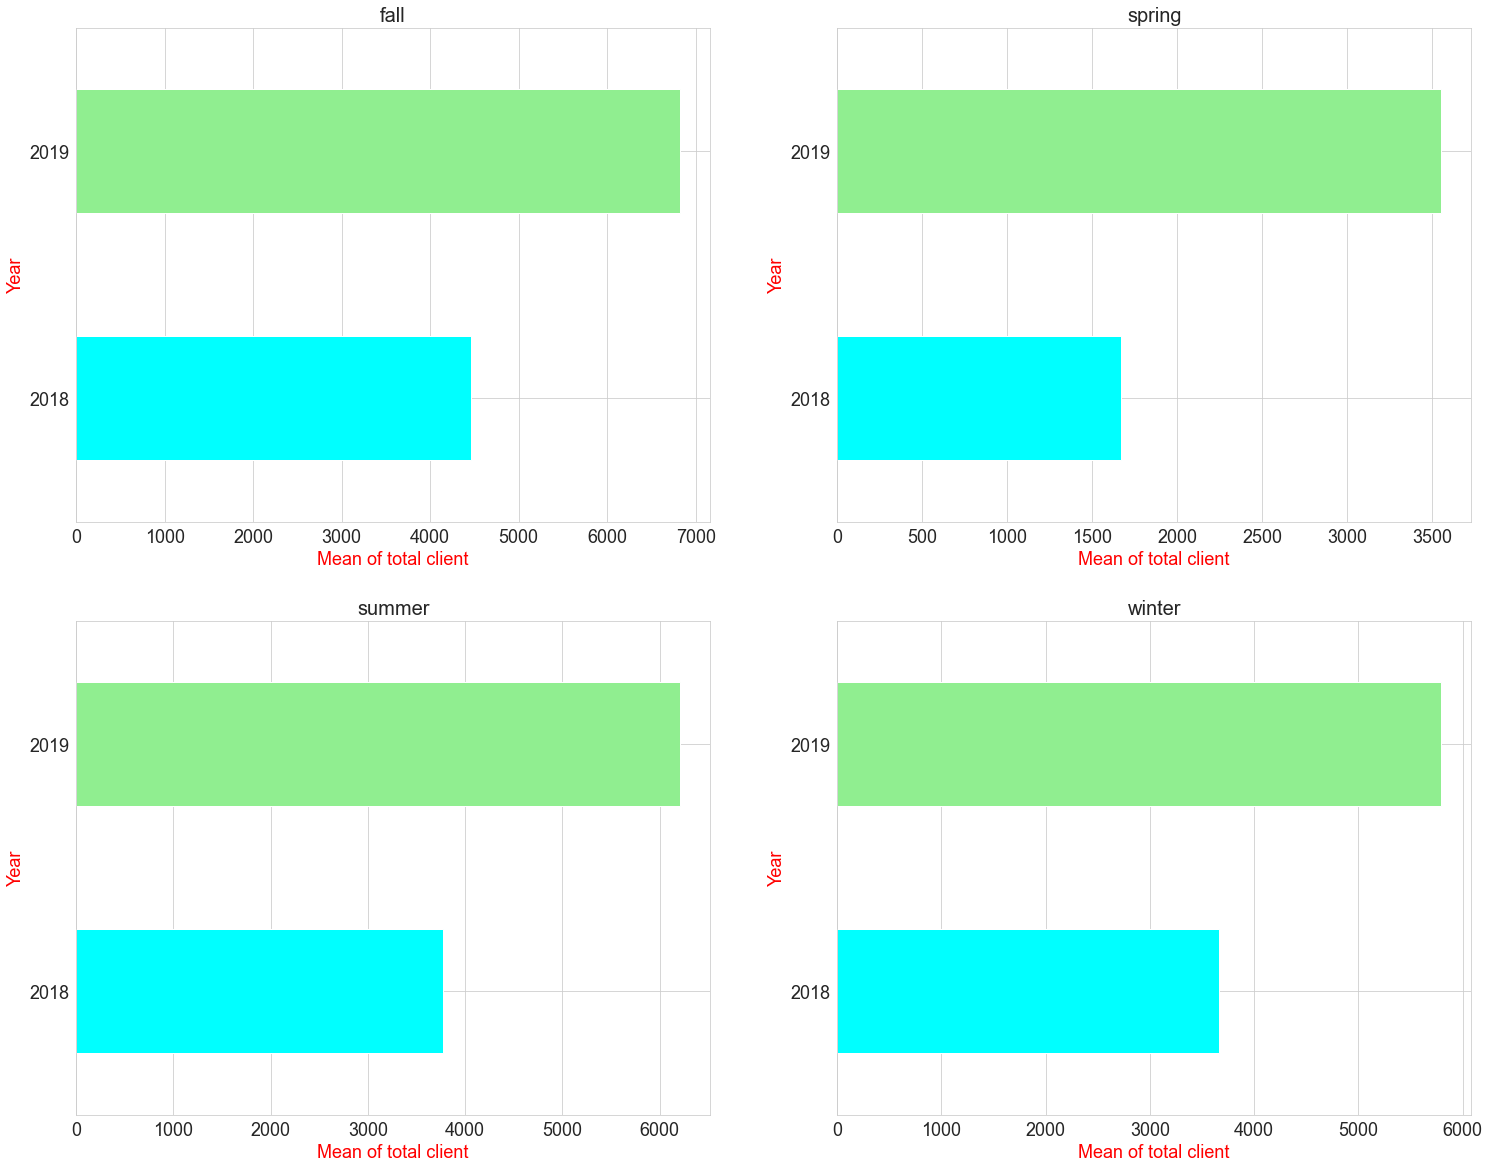

In [45]:
groupindex=0
plt.figure(figsize=[25,20])
for j in range(1,len(dfs)+1):
    plt.subplot(2,2,j)
    dfs[groupindex].groupby(['yr']).cnt.mean().plot.barh(color=['cyan','lightgreen','yellow','lightblue'])
    plt.title(names[groupindex],fontdict={'fontsize':20})
    label=[2018,2019]
    yticks=[0,1]
    plt.yticks(yticks,label,fontsize=18)
    plt.xticks(fontsize=18)
    plt.ylabel("Year",fontdict={'fontsize':18,'color':'Red'})
    plt.xlabel("Mean of total client",fontdict={'fontsize':18,'color':'Red'})
    groupindex+=1
    
plt.show()

<B>Observation-:</B> We can see the <B>demand</B> or <B>total clients</B>  are significantly higher in <B>2019 in comparison to 2018</B> of across all the seasons. 

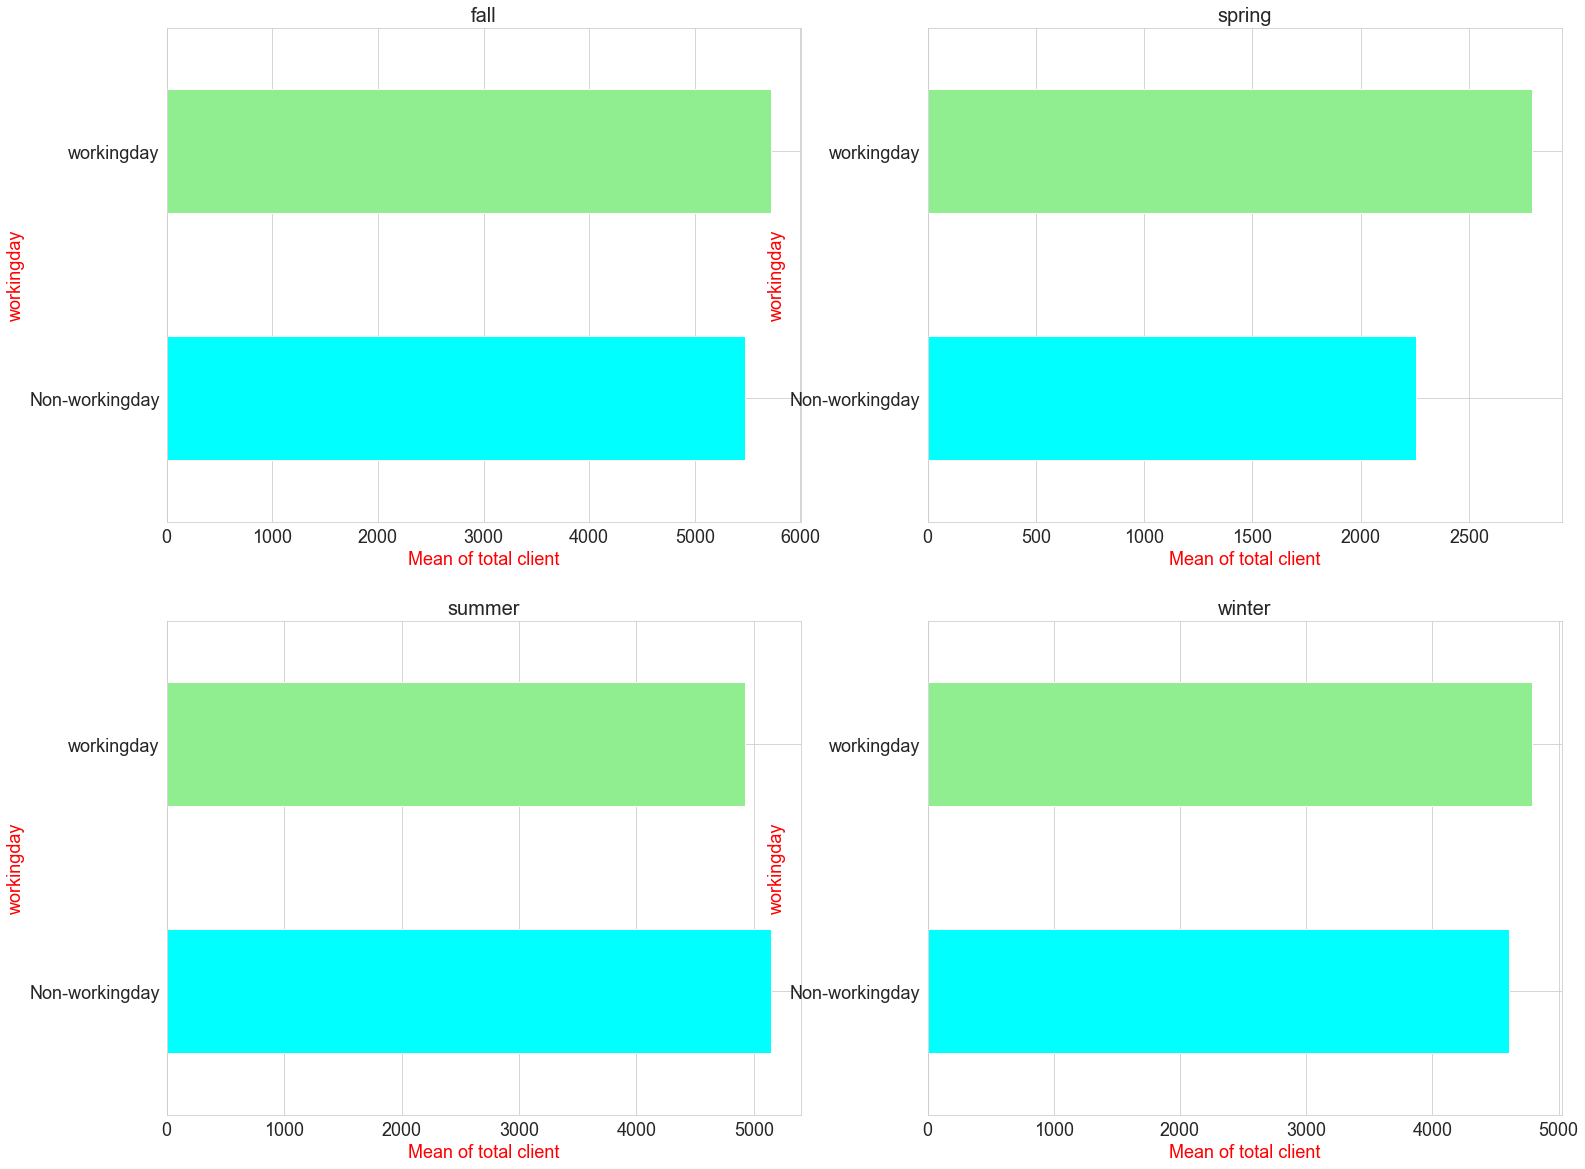

In [46]:
groupindex=0
plt.figure(figsize=[25,20])
for j in range(1,len(dfs)+1):
    plt.subplot(2,2,j)
    dfs[groupindex].groupby(['workingday']).cnt.mean().plot.barh(color=['cyan','lightgreen','yellow','lightblue'])
    plt.title(names[groupindex],fontdict={'fontsize':20})
    label=['Non-workingday','workingday']
    yticks=[0,1]
    plt.yticks(yticks,label,fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel("Mean of total client",fontdict={'fontsize':18,'color':'Red'})
    plt.ylabel("workingday",fontdict={'fontsize':18,'color':'Red'})
    groupindex+=1
    
plt.show()

<B>Observation-:</B> We can see the <B>demand</B> or <B>total clients</B>  are significantly higher in <B>working days in comparison to non working days</B> except <B>summer season </B>. 

<center><h4>Understanding spread of mean of total clients in year w.r.t  (weathersit,workingday)</h4></center>

In [47]:
weathergroup=bikeshare_df.groupby("yr")
dfs=[]
names=[]
for name, group in weathergroup:
    dfs.append(group)
    names.append(name)

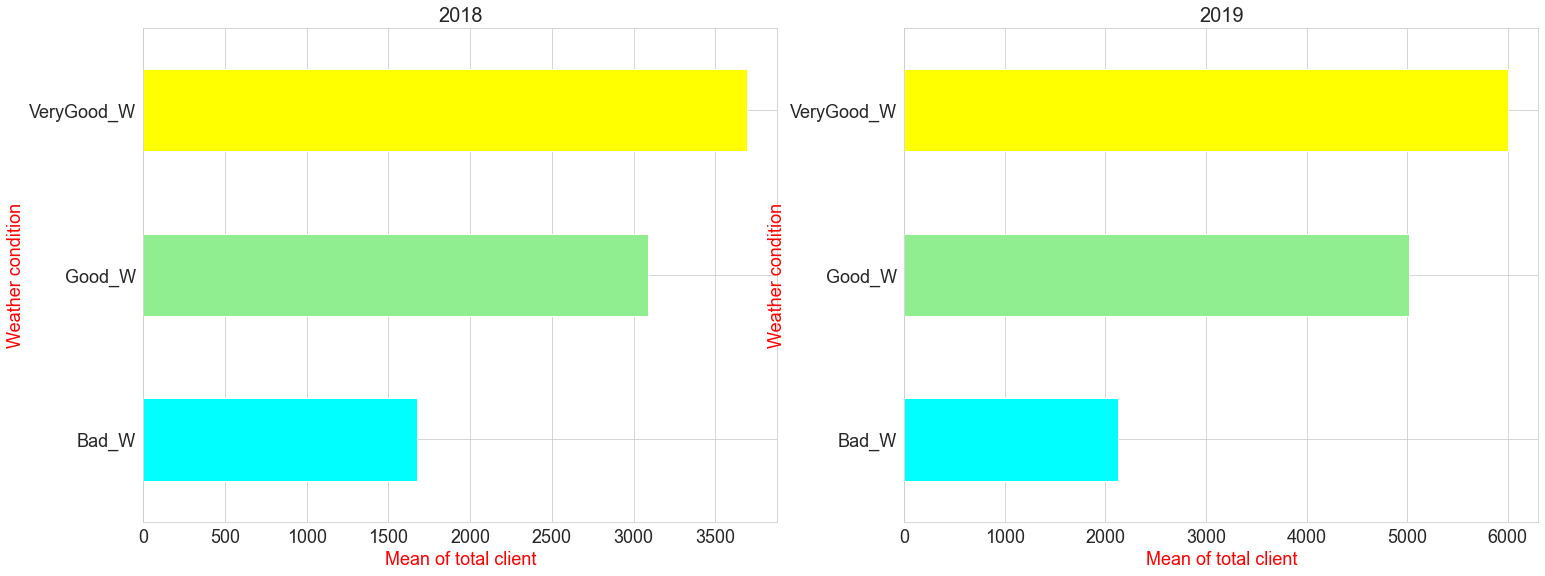

In [48]:
groupindex=0
plt.figure(figsize=[25,20])
n=['2018'if i==0 else '2019' for i in names]
for j in range(1,len(dfs)+1):
    plt.subplot(2,2,j)
    dfs[groupindex].groupby(['weathersit']).cnt.mean().plot.barh(color=['cyan','lightgreen','yellow','lightblue'])
    plt.title(n[groupindex],fontdict={'fontsize':20})
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel("Mean of total client",fontdict={'fontsize':18,'color':'Red'})
    plt.ylabel("Weather condition",fontdict={'fontsize':18,'color':'Red'})
    groupindex+=1
    
plt.show()

<B>Observation-:</B> We can see the <B>demand</B> or <B>total clients</B>  are significantly higher in <B>Very good weather condition irrespective of the <B>year</B>.

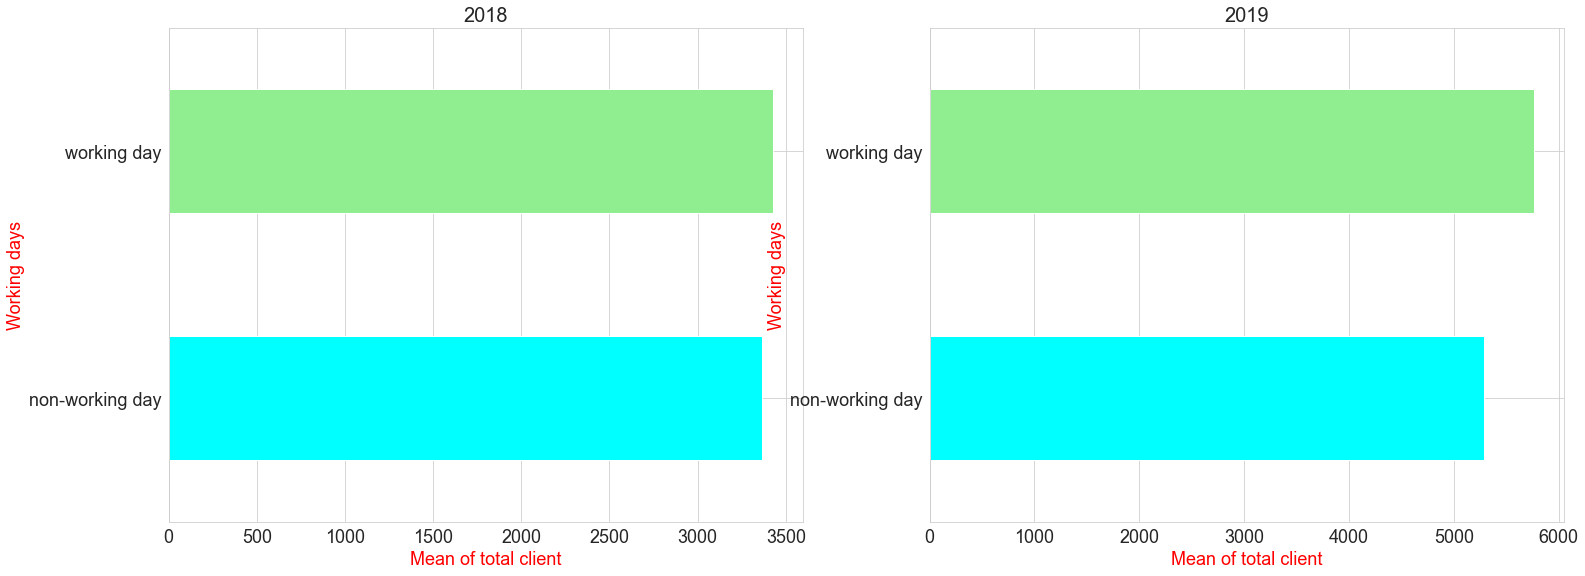

In [49]:
groupindex=0
plt.figure(figsize=[25,20])
n=['2018'if i==0 else '2019' for i in names]
for j in range(1,len(dfs)+1):
    plt.subplot(2,2,j)
    dfs[groupindex].groupby(['workingday']).cnt.mean().plot.barh(color=['cyan','lightgreen','yellow','lightblue'])
    plt.title(n[groupindex],fontdict={'fontsize':20})
    ticks=[1,0]
    labels=['working day','non-working day']
    plt.yticks(ticks,labels,fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel("Mean of total client",fontdict={'fontsize':18,'color':'Red'})
    plt.ylabel("Working days",fontdict={'fontsize':18,'color':'Red'})
    groupindex+=1
    
plt.show()

<B>Observation-:</B> We can see the <B>demand</B> or <B>total clients</B>  are significantly higher in <B>working days in comparison to non working days</B>  <B>irrespective of the year. </B>.

<center><h4>Understanding spread of mean of total clients in workingday w.r.t weathersit</h4></center>

In [50]:
weathergroup=bikeshare_df.groupby("workingday")
dfs=[]
names=[]
for name, group in weathergroup:
    dfs.append(group)
    names.append(name)

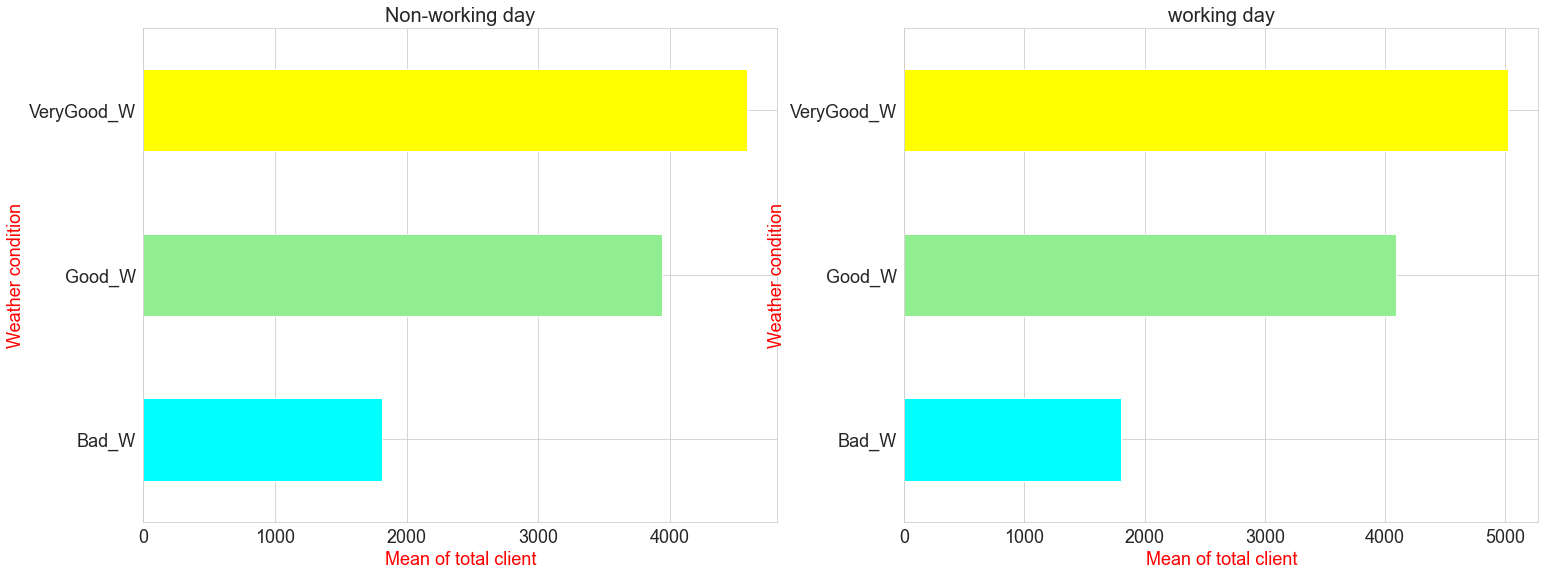

In [51]:
groupindex=0
plt.figure(figsize=[25,20])
n=['Non-working day'if i==0 else 'working day' for i in names]
for j in range(1,len(dfs)+1):
    plt.subplot(2,2,j)
    dfs[groupindex].groupby(['weathersit']).cnt.mean().plot.barh(color=['cyan','lightgreen','yellow','lightblue'])
    plt.title(n[groupindex],fontdict={'fontsize':20})
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.xlabel("Mean of total client",fontdict={'fontsize':18,'color':'Red'})
    plt.ylabel("Weather condition",fontdict={'fontsize':18,'color':'Red'})
    groupindex+=1
    
plt.show()

<B>Observation-:</B> We can see the <B>demand</B> or <B>total clients</B>  are significantly higher in <B>Very good weather condition in comparison to bad weather condition </B>  <B>irrespective of the working / non working day </B>.

<center><h1>Summary<h1></center>

-  <B> There is almost equal distribution of data on all the season.</B>`
-  <B>In both the years the population is distributed almost equally.</B>
-  <B>In given datset working days are more than non working days.</B>
-  <B>Distribution of population is zero for the very bad weather , and lesser for bad weather and increasing significantly with better weather.</B>
-  <B>Distribution of population is very less toward the extreme points of feeling temprature , and increasing towards mean temprature which is ~24 degree celcius.</B>
-  <B>In given datset mean of the total client is 4508 , can be as min as 22 and as max as 8714 per day.</B>
-  <B>There is a huge fall in the demand or total clients in spring in 2018 and 2019.</B>
-  <B>There is a huge boost in the demand or total clients in 2019 in comparision to 2018 , which can be a sign of increasing popularity of the brand.</B>
-  <B>The demand of shared bikes are more in case of working days in comparision to non working days , might be more people are using shared bikes for commuting to workplace or people are not travelling much if it is not as necessary as somthing like work as this data is recorded in COVID.</B>
-  <B>The demand of shared bikes are more in case of very good weather condition and null for very bad weather condition .</B>
-  <B>The demand or total clients are higher in a normal heat index of 20 to 35 , above or below of this range number of clients are decreasing.</B>
-  <B>The demand or total clients are significantly higher in a very good weather condition of across all the seasons.</B>
-  <B>The demand or total clients are significantly higher in 2019 in comparison to 2018  across all the seasons.</B>
-  <B>The demand or total clients are significantly higher in working days in comparison to non working days except summer season .</B>
-  <B>The demand or total clients are significantly higher in Very good weather condition irrespective of the year.</B>
-  <B>The demand or total clients are significantly higher in Very good weather condition in comparison to bad weather condition irrespective of the working / non working day .</B>
-  <B>The demand or total clients are significantly higher in working days in comparison to non working days irrespective of the year.</B>

<center><h1>Modeling a linear regression model</h1></center>

In [52]:
bikeshare_df.head()

,season,yr,workingday,weathersit,atemp,cnt
0,spring,0,0,Good_W,18.18125,985
1,spring,0,0,Good_W,17.68695,801
2,spring,0,1,VeryGood_W,9.47025,1349
3,spring,0,1,VeryGood_W,10.60610,1562
4,spring,0,1,VeryGood_W,11.46350,1600


<center><h3>Creating dummy variables from categorical columns to fit them into linear regression model</h3></center>

In [53]:
temp_df=pd.get_dummies(bikeshare_df['season'],drop_first=True)
temp_df
bikeshare_df=pd.concat([bikeshare_df,temp_df],axis=1)
bikeshare_df=bikeshare_df.drop('season',axis=1)

We have converted the <B>season</B> variable into dummy variables <B>fall,spring,summer,winter</B> for fitting season into our <B>linear regression model</B> , as only <B>numeric values</B> can be considered in a linear regression model , and dropped the first dummy variable <B>fall</B> as the value <B>spring=0 , summer=0 , and winter =0</B> will automatically convey <B>fall as the current season.</B>

In [54]:
bikeshare_df

,yr,workingday,weathersit,atemp,cnt,spring,summer,winter
0,0,0,Good_W,18.18125,985,1,0,0
1,0,0,Good_W,17.68695,801,1,0,0
2,0,1,VeryGood_W,9.47025,1349,1,0,0
3,0,1,VeryGood_W,10.60610,1562,1,0,0
4,0,1,VeryGood_W,11.46350,1600,1,0,0
...,...,...,...,...,...,...,...,...
725,1,1,Good_W,11.33210,2114,1,0,0
726,1,1,Good_W,12.75230,3095,1,0,0
727,1,0,Good_W,12.12000,1341,1,0,0
728,1,0,VeryGood_W,11.58500,1796,1,0,0


In [55]:
temp_df=pd.get_dummies(bikeshare_df['weathersit'],drop_first=True)
temp_df
bikeshare_df=pd.concat([bikeshare_df,temp_df],axis=1)
bikeshare_df=bikeshare_df.drop('weathersit',axis=1)

We have converted the <B>weathersit</B> variable into dummy variables <B>Bad_W,Good_W,VeryGood_W</B> for fitting weathersit into our <B>linear regression model</B> , as only <B>numeric values</B> can be considered in a linear regression model , and dropped the first dummy variable <B>Bad_W</B> as the value <B>Good_W=0 , VeryGood_W=0 </B> will automatically convey <B>Bad_W as the current weathersit.</B>

In [56]:
bikeshare_df

,yr,workingday,atemp,cnt,spring,summer,winter,Good_W,VeryGood_W
0,0,0,18.18125,985,1,0,0,1,0
1,0,0,17.68695,801,1,0,0,1,0
2,0,1,9.47025,1349,1,0,0,0,1
3,0,1,10.60610,1562,1,0,0,0,1
4,0,1,11.46350,1600,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
725,1,1,11.33210,2114,1,0,0,1,0
726,1,1,12.75230,3095,1,0,0,1,0
727,1,0,12.12000,1341,1,0,0,1,0
728,1,0,11.58500,1796,1,0,0,0,1


<center><h3>importing important libraries for model building and evaluation</h3></center>

In [57]:
# importing important libraries for model building and evaluation
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

<center><h3>Spliting data into train and test data set.</h3></center>

Done a <B>80-20 %</B> split for relatively accurate prediction as the data size is very less.

In [58]:
bikeshare_traindf,bikeshare_testdf=train_test_split(bikeshare_df,train_size=0.8,random_state=100)

In [59]:
print(bikeshare_traindf.shape)
print(bikeshare_testdf.shape)

(584, 9)
(146, 9)


<center><h3>Scaling data using minmax scaler</h3></center>

-  Why scaling ?
> As we can see most of our variables scale differently , giving differnt scales of independent variables will change the dependent variable in different scale with respect to different independent variables , hence we have to scale our variables to a common scale to perform the prediction of dependent variable (Target variable). 

-  Why minmax scaler ?
>   Incase of our data set as we have  seen we do not have any <B>outliers</B> <B>(from outlier analysis     section)</B> .Hence we do not have to worry about the incorrect scale due to presence of ouliers.<BR>Hence let's choose Min-Max scaler to scale the variables down to a common scale from 0-1.

In [60]:
scalerobj=MinMaxScaler()
bikeshare_traindf[['atemp','cnt']]=scalerobj.fit_transform(bikeshare_traindf[['atemp','cnt']])
bikeshare_traindf.head()

,yr,workingday,atemp,cnt,spring,summer,winter,Good_W,VeryGood_W
367,1,1,0.061963,0.254717,1,0,0,0,1
648,1,1,0.462175,0.868385,0,0,1,0,1
44,0,1,0.419099,0.217556,1,0,0,0,1
705,1,1,0.318824,0.573631,0,0,1,1,0
379,1,0,0.108365,0.263346,1,0,0,0,1


<center><h3>Separating training target and training predictor variables </h3></center>

In [61]:
train_target=bikeshare_traindf.pop('cnt')
train_predictors=bikeshare_traindf

In [62]:
print(train_target[:5])
print(train_predictors.head())

367    0.254717
648    0.868385
44     0.217556
705    0.573631
379    0.263346
Name: cnt, dtype: float64
     yr  workingday     atemp  spring  summer  winter  Good_W  VeryGood_W
367   1           1  0.061963       1       0       0       0           1
648   1           1  0.462175       0       0       1       0           1
44    0           1  0.419099       1       0       0       0           1
705   1           1  0.318824       0       0       1       1           0
379   1           0  0.108365       1       0       0       0           1


In [63]:
#Adding constant for evaluating Y-Intercept , as it is explicitly required by stats model
#Other wise the regression line will automatically assume 0 as y-intercept which might be wrong for our prediction.

train_predictors_added_constant=sm.add_constant(train_predictors)
train_predictors_added_constant.head()

,const,yr,workingday,atemp,spring,summer,winter,Good_W,VeryGood_W
367,1.0,1,1,0.061963,1,0,0,0,1
648,1.0,1,1,0.462175,0,0,1,0,1
44,1.0,0,1,0.419099,1,0,0,0,1
705,1.0,1,1,0.318824,0,0,1,1,0
379,1.0,1,0,0.108365,1,0,0,0,1


<center><h3>Constructing a model using statsmodels library</h3></center>

In [64]:
lrObj=sm.OLS(train_target,train_predictors_added_constant)
lrmodel=lrObj.fit()

In [65]:
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     313.5
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          4.47e-204
Time:                        21:45:47   Log-Likelihood:                 532.48
No. Observations:                 584   AIC:                            -1047.
Df Residuals:                     575   BIC:                            -1008.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1414      0.035     -4.010      0.000      -0.211      -0.072
yr             0.2302      0.008     28.222      0.000       0.214       0.246
workingday     0.0292      0.009      3.377      0.001       0.012       0.046
atemp          0.5096      0.033     15.282      0.000       0.444       0.575
spring        -0.1058      0.019     -5.479      0.000      -0.144      -0.068
summer         0.0237      0.013      1.829      0.068      -0.002       0.049
winter         0.0710      0.015      4.637      0.000       0.041       0.101
Good_W         0.2212      0.026      8.631      0.000       0.171       0.271
VeryGood_W     0.2939      0.025     11.634      0.000       0.244       0.343
==============================================================================
Omnibus:                       78.287   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.730
Skew:                          -0.661   Prob(JB):                     3.19e-48
Kurtosis:                       5.691   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<B>Observation-:</B> We can see all of the predictor variables are having high significance except <B>summer</B>. And our <B>Adjusted r2</B> is <B>81.1%</B> which is a pretty good model. But still we have to drop the <B>summer</B> variable as it is <B>highly insignificant where p=0.068 (p>5%)</B>

In [66]:
train_predictors_added_constant=train_predictors_added_constant.drop('summer',axis=1)

<center><h3>Rebuilding model after droping summer.</h3></center>

In [67]:
lrObj=sm.OLS(train_target,train_predictors_added_constant)
lrmodel=lrObj.fit()

In [68]:
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     356.4
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          1.20e-204
Time:                        21:45:48   Log-Likelihood:                 530.79
No. Observations:                 584   AIC:                            -1046.
Df Residuals:                     576   BIC:                            -1011.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1137      0.032     -3.563      0.000      -0.176      -0.051
yr             0.2308      0.008     28.258      0.000       0.215       0.247
workingday     0.0296      0.009      3.421      0.001       0.013       0.047
atemp          0.4819      0.030     16.189      0.000       0.423       0.540
spring        -0.1280      0.015     -8.512      0.000      -0.158      -0.098
winter         0.0533      0.012      4.484      0.000       0.030       0.077
Good_W         0.2235      0.026      8.714      0.000       0.173       0.274
VeryGood_W     0.2955      0.025     11.680      0.000       0.246       0.345
==============================================================================
Omnibus:                       79.008   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.186
Skew:                          -0.669   Prob(JB):                     2.54e-48
Kurtosis:                       5.686   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<B>Observation-:</B> We can now see all of our predictors are very significant and our <B>adjusted r2 is 81.0</B> which was <B>previously 81.1</B> so removing summer was a <B>good choice</B> as it was contributing little to our prediction. But Let's check for the <B> Variance inflation factor</B> or <B>multicolinearity</B> between the predictors.

<center><h3>Checking the variance inflation factor of predictor variables</h3></center>

In [69]:
VIF=pd.DataFrame()
train_predictors=train_predictors.drop('summer',axis=1)
VIF['features']=train_predictors.columns
VIF['VIF']=[variance_inflation_factor(train_predictors.values,i) for i in range(train_predictors.shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)

In [70]:
VIF

,features,VIF
6,VeryGood_W,11.334482
2,atemp,11.231950
5,Good_W,6.273265
1,workingday,2.923547
3,spring,2.562437
0,yr,2.070563
4,winter,1.687827


<B>Observation-:</B>We can see the <B>VIF </B> of <B>very good weather</B> is <B>high as 11.334482</B> .So it is being highly correlated or explained by some other predictors in the data set. Hence it is a very good step to drop the VeryGood_W variable . 

In [71]:
VeryGood_W=train_predictors_added_constant.pop('VeryGood_W')

<center><h3>Rebuilding model after droping VeryGood_W.</h3></center>

In [72]:
lrObj=sm.OLS(train_target,train_predictors_added_constant)
lrmodel=lrObj.fit()

In [73]:
lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     318.3
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          2.18e-179
Time:                        21:45:48   Log-Likelihood:                 468.71
No. Observations:                 584   AIC:                            -923.4
Df Residuals:                     577   BIC:                            -892.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1591      0.024      6.590      0.000       0.112       0.207
yr             0.2349      0.009     25.911      0.000       0.217       0.253
workingday     0.0255      0.010      2.652      0.008       0.007       0.044
atemp          0.5028      0.033     15.227      0.000       0.438       0.568
spring        -0.1213      0.017     -7.266      0.000      -0.154      -0.089
winter         0.0462      0.013      3.503      0.000       0.020       0.072
Good_W        -0.0587      0.010     -6.129      0.000      -0.077      -0.040
==============================================================================
Omnibus:                      160.939   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.094
Skew:                          -1.195   Prob(JB):                    3.10e-146
Kurtosis:                       7.672   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model1=lrmodel

In [75]:
VIF=pd.DataFrame()
VeryGood_W_VIF=train_predictors.pop('VeryGood_W')
VIF['features']=train_predictors.columns
VIF['VIF']=[variance_inflation_factor(train_predictors.values,i) for i in range(train_predictors.shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)

In [76]:
VIF

,features,VIF
2,atemp,3.201884
1,workingday,2.857787
0,yr,2.041887
5,Good_W,1.478454
3,spring,1.320292
4,winter,1.310839


<B>Observation</B>-: Now that we can see the <B>VIF</B> of all the existing variables are <B>less than 5</B> , all the predictors are <B>highly significant</B> and our <B>adjusted r2 score is 76.6% </B>which is an acceptable accuracy of our model  <B>But</B> if we observe the <B>sign of the coefficient of good weather</B> is changing upon <B>removal of the very good weather.</B> Hence we will <B>reintegrate the verygood weather</B> and try to remove any other predictor with high VIF. 
- <B>Assumption</B> -: As good weather should be positively impacting the commute .

*******************************************************************************************************************************
<center><B>Re-Integrating VeryGood_W as removal causes a sign change of Good_W as they might be highly corellated.</B></center>

In [77]:
train_predictors=pd.concat([train_predictors,VeryGood_W_VIF],axis=1)
train_predictors_added_constant=pd.concat([train_predictors_added_constant,VeryGood_W],axis=1)

*******************************************************************************************************************************
<center><B>Re-Building the model after integrating the VeryGood_W</B></center>

In [78]:
lrObj=sm.OLS(train_target,train_predictors_added_constant)
lrmodel=lrObj.fit()

lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     356.4
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          1.20e-204
Time:                        21:45:52   Log-Likelihood:                 530.79
No. Observations:                 584   AIC:                            -1046.
Df Residuals:                     576   BIC:                            -1011.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1137      0.032     -3.563      0.000      -0.176      -0.051
yr             0.2308      0.008     28.258      0.000       0.215       0.247
workingday     0.0296      0.009      3.421      0.001       0.013       0.047
atemp          0.4819      0.030     16.189      0.000       0.423       0.540
spring        -0.1280      0.015     -8.512      0.000      -0.158      -0.098
winter         0.0533      0.012      4.484      0.000       0.030       0.077
Good_W         0.2235      0.026      8.714      0.000       0.173       0.274
VeryGood_W     0.2955      0.025     11.680      0.000       0.246       0.345
==============================================================================
Omnibus:                       79.008   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.186
Skew:                          -0.669   Prob(JB):                     2.54e-48
Kurtosis:                       5.686   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
VIF=pd.DataFrame()
VIF['features']=train_predictors.columns
VIF['VIF']=[variance_inflation_factor(train_predictors.values,i) for i in range(train_predictors.shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)
VIF

,features,VIF
6,VeryGood_W,11.334482
2,atemp,11.231950
5,Good_W,6.273265
1,workingday,2.923547
3,spring,2.562437
0,yr,2.070563
4,winter,1.687827


*******************************************************************************************************************************
<center><B>Let's  remove atemp as that is having the highest VIF after VeryGood_W and rebuild the model</B></center>

In [80]:
atemp=train_predictors_added_constant.pop('atemp')

In [81]:
lrObj=sm.OLS(train_target,train_predictors_added_constant)
lrmodel=lrObj.fit()

lrmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     256.2
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          4.39e-159
Time:                        21:45:52   Log-Likelihood:                 421.29
No. Observations:                 584   AIC:                            -828.6
Df Residuals:                     577   BIC:                            -798.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1789      0.032      5.645      0.000       0.117       0.241
yr             0.2403      0.010     24.476      0.000       0.221       0.260
workingday     0.0335      0.010      3.213      0.001       0.013       0.054
spring        -0.3104      0.012    -25.877      0.000      -0.334      -0.287
winter        -0.0504      0.012     -4.176      0.000      -0.074      -0.027
Good_W         0.2341      0.031      7.577      0.000       0.173       0.295
VeryGood_W     0.3200      0.030     10.517      0.000       0.260       0.380
==============================================================================
Omnibus:                       46.734   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.889
Skew:                          -0.439   Prob(JB):                     3.73e-24
Kurtosis:                       4.914   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
VIF=pd.DataFrame()
atemp=train_predictors.pop('atemp')
VIF['features']=train_predictors.columns
VIF['VIF']=[variance_inflation_factor(train_predictors.values,i) for i in range(train_predictors.shape[1])]
VIF=VIF.sort_values('VIF',ascending=False)
VIF

,features,VIF
5,VeryGood_W,3.231113
1,workingday,2.839747
4,Good_W,2.350609
0,yr,2.039843
2,spring,1.476528
3,winter,1.443743


In [83]:
model2=lrmodel

<B>if we observe the sign of the coefficient of winter is changing upon removal of atemp.<B>
<B>It also makes sense to reduce the rate of change of commute in shared bikes with respect to winter because of the extreme cold temprature .So the demand of shared bike get negatively induced  by winter. hence Let's keep model2 as our final model.

<B>Graph we have plotted to see the relation between demand and seasons in bivariate analysis proves the above fact</B>
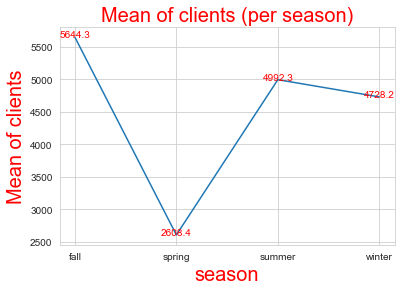

<center><h1>Resudial analysis</h1></center>

<center><h3>Calculating Resudials</h3></center>

In [84]:
train_predicted_target=model2.predict(train_predictors_added_constant)

In [85]:
resudial=train_predicted_target-train_target
resudial.shape

(584,)

<h4>Validating Assumption -: The resudials should be distributed normally , as there mean being 0 .</h4>

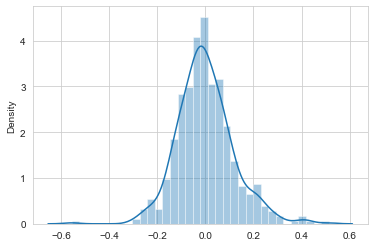

In [86]:
sns.distplot(resudial)
plt.show()

<B>Observation-:</B>
-  As we can  see the the resudials have an normal distribution.
-  It seems like the mean of the probability distribution curve from the distribution plot above is centered around 0.

<h4>Validating Assumption -: The resudials be randomly distributed and the distribution should follow homoscedasticity .</h4>

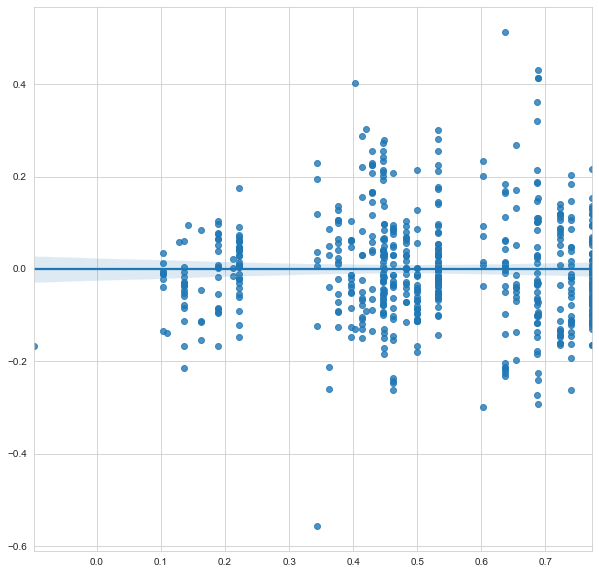

In [87]:
plt.figure(figsize=[10,10])
sns.regplot(train_predicted_target,resudial)
plt.show()

<B>Observation-:</B>
-  As we can  see the the resudials have a <B>random distribution</B>.
-  And we can see the distribution is more likely between <B>-0.2 to 0.2</B> which validates our assumption of homoscedasticity .

<center><h1>Evaluation of model on test data set<h1></center>

<B>As the model is already being fit with the min max of the train data set , we only have to transform the test data set </B>

In [88]:
bikeshare_testdf[['atemp','cnt']]=scalerobj.transform(bikeshare_testdf[['atemp','cnt']])
bikeshare_testdf.head()

,yr,workingday,atemp,cnt,spring,summer,winter,Good_W,VeryGood_W
184,0,0,0.769660,0.692706,0,0,0,1,0
535,1,1,0.842587,0.712034,0,1,0,0,1
299,0,1,0.496145,0.303382,0,0,1,1,0
221,0,1,0.795343,0.547400,0,0,0,0,1
152,0,1,0.741471,0.569029,0,1,0,0,1


<center><h3>Separating testing target and testing predictor variables </h3></center>

In [89]:
test_target=bikeshare_testdf.pop('cnt')
test_predictors=bikeshare_testdf

print(test_target[:5])
print(test_predictors.head())

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64
     yr  workingday     atemp  spring  summer  winter  Good_W  VeryGood_W
184   0           0  0.769660       0       0       0       1           0
535   1           1  0.842587       0       1       0       0           1
299   0           1  0.496145       0       0       1       1           0
221   0           1  0.795343       0       0       0       0           1
152   0           1  0.741471       0       1       0       0           1


In [90]:
#Adding constant for evaluating Y-Intercept , as it is explicitly required by stats model
#Other wise the regression line will automatically assume 0 as y-intercept which might be wrong for our prediction.

In [91]:
test_predictors_added_constant=sm.add_constant(test_predictors)
test_predictors_added_constant.head()

,const,yr,workingday,atemp,spring,summer,winter,Good_W,VeryGood_W
184,1.0,0,0,0.769660,0,0,0,1,0
535,1.0,1,1,0.842587,0,1,0,0,1
299,1.0,0,1,0.496145,0,0,1,1,0
221,1.0,0,1,0.795343,0,0,0,0,1
152,1.0,0,1,0.741471,0,1,0,0,1


<B>Equalizing</B> the shape of test predictors data frame as we have removed <B>summer</B> and <B>Good_W</B> from our <B>training predictors data set</B> , which trained our model. 

In [92]:
test_predictors_added_constant=test_predictors_added_constant.drop(['summer','atemp'],axis=1)

In [93]:
test_predictors_added_constant

,const,yr,workingday,spring,winter,Good_W,VeryGood_W
184,1.0,0,0,0,0,1,0
535,1.0,1,1,0,0,0,1
299,1.0,0,1,0,1,1,0
221,1.0,0,1,0,0,0,1
152,1.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...
219,1.0,0,1,0,0,0,1
719,1.0,1,1,1,0,1,0
3,1.0,0,1,1,0,0,1
392,1.0,1,0,1,0,0,1


<center><B>Predicting the test target using trained model</center></B>

In [94]:
test_predicted_target=model2.predict(test_predictors_added_constant)

<center><h2>Acessing model</h2></center>

In [95]:
r2_score(y_true=test_target,y_pred=test_predicted_target)

0.7396741012966406

In [96]:
r2_score(y_true=train_target,y_pred=train_predicted_target)

0.7270846016948482

<B>Observation-:</B>
-  As we can  see the the trained model have a r2-score of ~72.7 on traindata, which gives a r2_score of ~73.96 on test data which is a good model.  
-  Hence we can say our model is a good fit for the prediction of the cnt or total client demands.  

In [97]:
model2.params

const         0.178874
yr            0.240287
workingday    0.033529
spring       -0.310422
winter       -0.050412
Good_W        0.234094
VeryGood_W    0.320031
dtype: float64

<center><h1>Equation for Multiple linear regression</h1></center>

<B>cnt=0.178874+yr X 0.240287+workingday X 0.033529+spring X (-0.310422)+winter X (-0.050412)+Good_W X 0.234094 +VeryGood_W X 0.320031</B>